In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Define the input grayscale image (6x6)
I = np.array([
    [50, 40, 30, 20, 10, 0],
    [55, 45, 35, 25, 15, 5],
    [60, 50, 40, 30, 20, 10],
    [65, 55, 45, 35, 25, 15],
    [70, 60, 50, 40, 30, 20],
    [75, 65, 55, 45, 35, 25]
], dtype=np.float32)


In [15]:
# Define the vertical edge detection filter (3x3)
K = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)

In [16]:
# Function to perform convolution with padding
def convolve_with_padding(image, kernel, padding_type='same'):
    if padding_type == 'same':
        pad = kernel.shape[0] // 2
        image_padded = np.pad(image, ((pad, pad), (pad, pad)), mode='constant', constant_values=0)
    else:
        image_padded = image
    
    image_height, image_width = image_padded.shape
    kernel_height, kernel_width = kernel.shape
    output_height = image_height - kernel_height + 1
    output_width = image_width - kernel_width + 1
    
    output = np.zeros((output_height, output_width))
    
    for i in range(output_height):
        for j in range(output_width):
            roi = image_padded[i:i+kernel_height, j:j+kernel_width]
            output[i, j] = np.sum(roi * kernel)
    
    return output

In [17]:
# Perform convolution with padding
output_padded = convolve_with_padding(I, K, padding_type='same')
print("Image:\n")
print(I)
print("kernel\n")
print(K)
print("output image")
print(output_padded)

Image:

[[50. 40. 30. 20. 10.  0.]
 [55. 45. 35. 25. 15.  5.]
 [60. 50. 40. 30. 20. 10.]
 [65. 55. 45. 35. 25. 15.]
 [70. 60. 50. 40. 30. 20.]
 [75. 65. 55. 45. 35. 25.]]
kernel

[[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]
output image
[[ 125.  -60.  -60.  -60.  -60.  -35.]
 [ 180.  -80.  -80.  -80.  -80.  -60.]
 [ 200.  -80.  -80.  -80.  -80.  -80.]
 [ 220.  -80.  -80.  -80.  -80. -100.]
 [ 240.  -80.  -80.  -80.  -80. -120.]
 [ 190.  -60.  -60.  -60.  -60. -100.]]


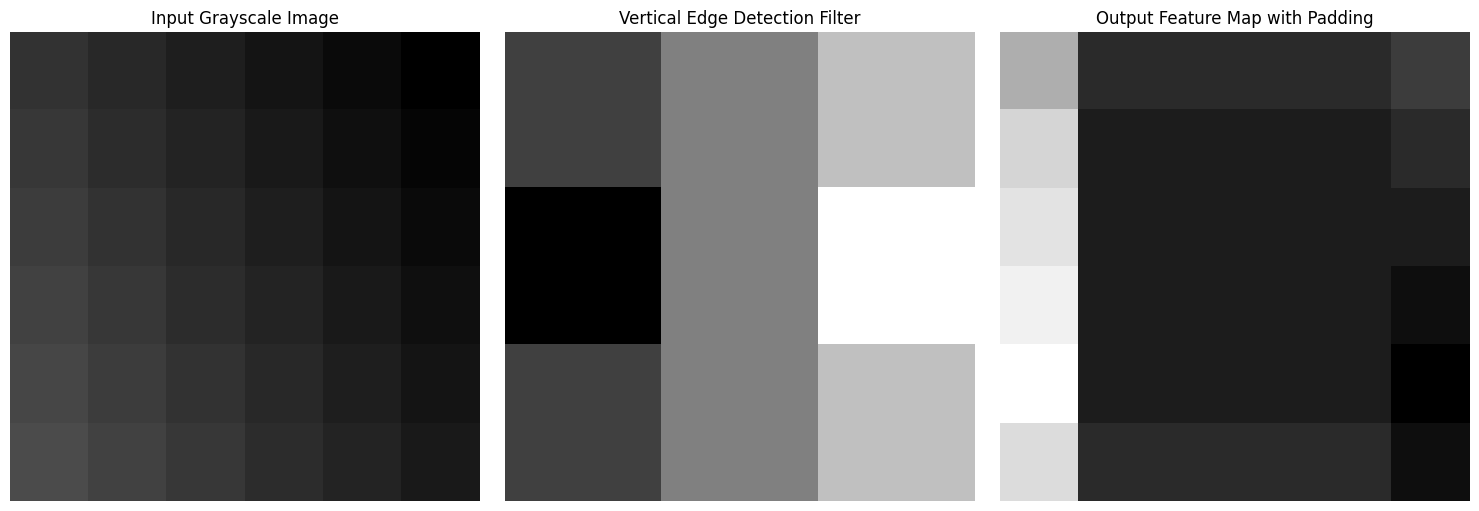

In [18]:
# Plotting the images
plt.figure(figsize=(15, 5))

# Plot Input Grayscale Image
plt.subplot(1, 3, 1)
plt.imshow(I, cmap='gray', vmin=0, vmax=255)
plt.title('Input Grayscale Image')
plt.axis('off')

# Plot Filter (Kernel)
plt.subplot(1, 3, 2)
plt.imshow(K, cmap='gray', vmin=-2, vmax=2)
plt.title('Vertical Edge Detection Filter')
plt.axis('off')

# Plot Output Feature Map with Padding
plt.subplot(1, 3, 3)
plt.imshow(output_padded, cmap='gray', vmin=np.min(output_padded), vmax=np.max(output_padded))
plt.title('Output Feature Map with Padding')
plt.axis('off')

plt.tight_layout()
plt.show()